## Srovnání numerického řešení ode a analytického řešení mathi. rovnic

In [64]:
using Plots
using BenchmarkTools
using Unitful

include("ion_traj.jl")

# parametry pasti
Vrf = 400  # napeti radialnich elektrod [V]
Udc = 1300  # napeti axialnich elektrod [V]
Ω = 2*pi * 30e6 # budici frekvence pasti [Hz]

# konstanty
m = 40 * convert(Float64,AtomicMassConstant / (1u"kg")) # hmotnost iontu
e = convert(Float64, ElementaryCharge / 1u"C") # naboj iontu
z0 = 2.25e-3  # vzdalenost axialnich elektrod od stredu pasti [m]
r0 = 0.6167e-3 # vzdalenost radialnich elektrod od stredu pasti [m]
κ = 0.0597
α = 0.7627
charge_mass_ratio = e/m

# externi DC pole
E_ext = [0, 0, 0]
delta_phi = [.1,.1,0]

# pocatecni podminky
#u0 = [0, 0, 0,0,1.0e-6,0] # v metrech
u0 = [charge_mass_ratio*α*Vrf*delta_phi[1]/(4*r0*Ω), -charge_mass_ratio*α*Vrf*delta_phi[2]/(4*r0*Ω), 0, 0, 1e-10, 0] # v metrech sym
#u0 = [0, -charge_mass_ratio*α*Vrf*delta_phi[2]/(2*r0*Ω), 0, 0, 1e-10, 0] # v metrech asym

tspan = (0.0, 8e-7)  # casovy rozsah reseni

traj = get_ion_traj(Vrf, Udc, Ω, E_ext, delta_phi, u0, tspan, sym_type=true); # trajektorie iontu

#gr()
#plot(traj, vars=(0,5))


Analytické řešení

In [65]:
include("mathi_traj_eext_phasediff.jl")


phi = [0,0,0]
tspan_an = range(0, 8e-7, length=601)
u0 = [0, 0, 0, 0,1e-10,0] # v metrech

(u, Per_sec, E_kin_avg_an) = get_mathi_traj(Vrf, Udc, Ω, u0, E_ext, delta_phi, phi, tspan_an, div=false, sym_type=true);

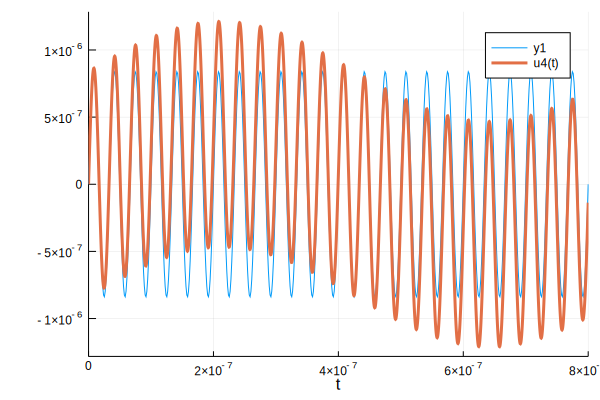

In [67]:
plot(tspan_an, u[:,4])
plot!( traj, vars=(0,4))

In [81]:
AtomicMassConstant 

Atomic mass constant (m_u)
Value                         = 1.6605390666e-27 kg
Standard uncertainty          = 5.0e-37 kg
Relative standard uncertainty = 3.0e-10
Reference                     = CODATA 2018